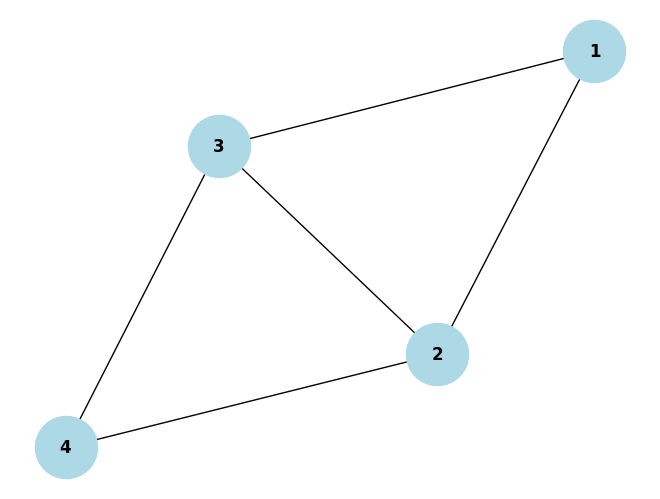

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.Graph()

# Добавляем рёбра
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)

# Отображаем граф
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=2000)
plt.show()

In [26]:
# Создание гиперкуба размерности 3
G_hypercube = nx.hypercube_graph(3)

# Получаем базисные циклы
cycles = nx.cycle_basis(G_hypercube)

# Выводим базисные циклы
print("Базисные циклы в гиперкубе размерности 3:")
for cycle in cycles:
    print(cycle)


Базисные циклы в гиперкубе размерности 3:
[(1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1)]
[(0, 1, 0), (0, 0, 0), (1, 0, 0), (1, 1, 0)]
[(1, 0, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0)]
[(0, 1, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1)]
[(0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 1)]


In [5]:
# Создание ориентированного графа
G_digraph = nx.DiGraph()

# Добавляем рёбра с обоими направлениями
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
for u, v in edges:
    G_digraph.add_edge(u, v)
    G_digraph.add_edge(v, u)  # Добавляем обратное направление

# Находим все циклы
cycles = nx.simple_cycles(G_digraph)

# Выводим все циклы
print("Циклы в ориентированном графе:")
for cycle in cycles:
    print(cycle)


Циклы в ориентированном графе:
[1, 2]
[1, 2, 3]
[1, 2, 4, 3]
[1, 3]
[1, 3, 2]
[1, 3, 4, 2]
[2, 3]
[2, 3, 4]
[2, 4]
[2, 4, 3]
[3, 4]


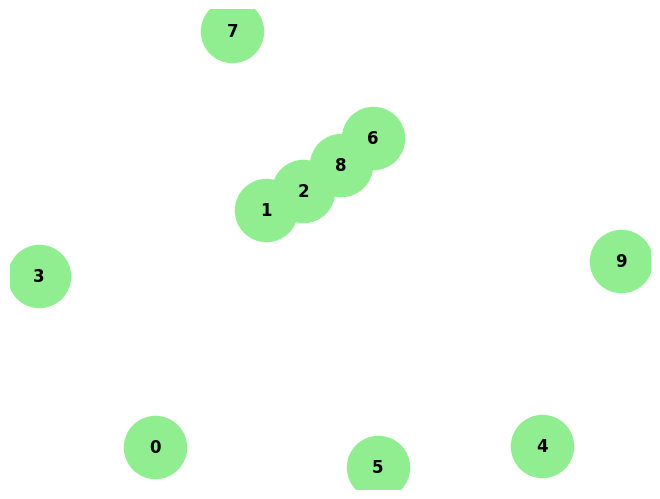

In [6]:
# Создаем случайный граф на 10 вершинах с вероятностью 0.1
G_random = nx.gnp_random_graph(10, 0.1)

# Отображаем граф
nx.draw(G_random, with_labels=True, node_color='lightgreen', font_weight='bold', node_size=2000)
plt.show()


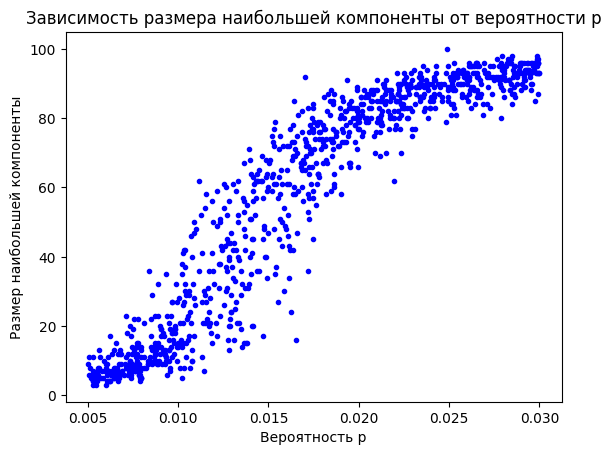

In [7]:
import random

# Список для хранения результатов
results = []

# Создаем 1000 случайных графов
for _ in range(1000):
    # Генерация случайной вероятности
    p = random.uniform(0.005, 0.03)
    
    # Создаем граф с этой вероятностью
    G_erdos = nx.erdos_renyi_graph(100, p)
    
    # Находим компоненты связности
    components = list(nx.connected_components(G_erdos))
    
    # Находим размер наибольшей компоненты
    largest_component_size = max(len(c) for c in components)
    
    # Добавляем результат
    results.append((p, largest_component_size))

# Разделим данные на две переменные для графика
p_values, component_sizes = zip(*results)

# Строим график
plt.plot(p_values, component_sizes, 'bo', markersize=3)
plt.xlabel("Вероятность p")
plt.ylabel("Размер наибольшей компоненты")
plt.title("Зависимость размера наибольшей компоненты от вероятности p")
plt.show()

Processing id: 974788
Processing id: 1145263
Processing id: 3964709
Processing id: 4859993
Processing id: 5382856
Processing id: 11449079
Processing id: 12446027
Processing id: 14347943
Processing id: 31085683
Processing id: 51414917
Processing id: 66831623
Processing id: 67094658
Processing id: 67236601
Processing id: 68777836
Processing id: 69483432
Processing id: 70280091
Processing id: 76789120
Processing id: 81129392
Processing id: 85666300
Processing id: 94982328
Processing id: 99067189
Processing id: 99314464
Processing id: 100118341
Processing id: 101648617
Processing id: 102025685
Processing id: 103120595
Processing id: 109529909
Processing id: 112152869
Processing id: 118805279
Processing id: 123596981
Processing id: 127897827
Processing id: 130116691
Processing id: 130196329
Processing id: 133969761
Processing id: 134390641
Processing id: 135051313
Processing id: 135116831
Processing id: 135677669
Processing id: 136033689
Processing id: 138769565
Processing id: 140150702
Pro

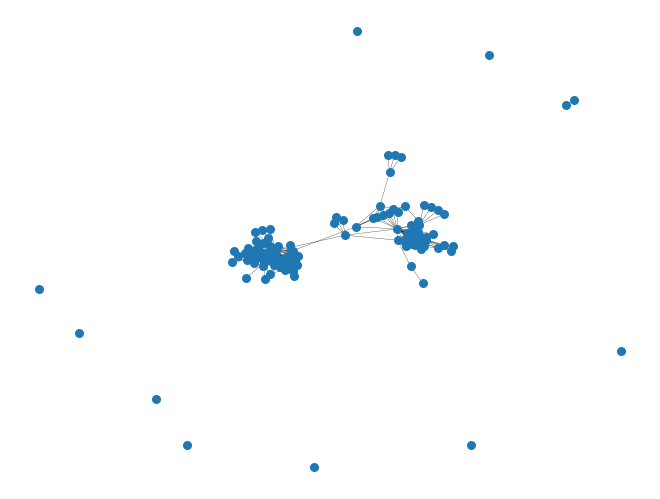

In [28]:
import requests
import time
import collections

def get_friends_ids(user_id):
 
    user_id =int(user_id)
    friends_url = (f'https://api.vk.com/method/friends.get?user_id={user_id}' 
                    f'&v=5.199&access_token=vk1.a.4Borm1d3lqOyKCpg8vw-L48i1xJZpNx0Jyj9cXbk5F0uOB3E78bPhVpE_5ruIOhzZwLC-AVtqxzz1K1I_j1TVRGuWSph7C-0wC74YrHKSAR9iksaJnd_9sCN0pvScA0nZmt9fUm4E57sDhr4SNB9h-CTz6vWFk9RW_BJpGOHelcRMqrKq0zR7wUZ4QegvgmTyyd_R6U2GuQE4Jr4aeOF0Q' )
    json_response = requests.get(friends_url).json()
    if 'error' in json_response:
        print (f"Error")
        return []
    time.sleep(0.34)
    return json_response.get('response', {}).get('items', [])

graph = {}
friend_ids = get_friends_ids(67229500)  # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:
    print (f'Processing id: {friend_id}')
    graph[friend_id] = get_friends_ids(friend_id)

g = nx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

pos = nx.spring_layout(g) 
nx.draw(g, pos, node_size=30, with_labels=False, width=0.2)